In [1]:
# Libraries
import numpy as np
import pandas as pd
import time
import cv2 as cv

In [2]:
from scipy.ndimage import gaussian_filter, median_filter

In [3]:
events = pd.read_csv("events.txt", names=["time", "x", "y", "polarity"], delimiter=" ")
width = 240 # size of frame width in px
height = 180 # size of frame height in px
events["y"] = height - events["y"]
events

,time,x,y,polarity
0,0.000000,198,96,0
1,0.000100,144,122,0
2,0.000108,188,15,1
3,0.000402,51,64,0
4,0.000434,122,42,0
...,...,...,...,...
17363971,59.736180,0,19,0
17363972,59.736213,81,161,1
17363973,59.736226,186,122,0
17363974,59.736229,11,98,0


# Time surface representation of events

In [27]:
from modules import TimeSurface

time_step_global = .1 # seconds
speed = 2
decay_const = 1
ts = TimeSurface(events, width, height, decay_const, time_step_global, update_type="static")
ts2 = TimeSurface(events, width, height, 4000, time_step_global, update_type="proportional")
# ts.cv_display(59, 240*3, 180*3, speedup=speed, blur_type="median 5")

In [28]:
frames = [(ts.new_surf(time=1) + 1)/2, (ts.new_surf(time=2) + 1)/2, (ts.new_surf(time=10) + 1)/2]
frames2 = [(ts2.new_surf(time=1) + 1)/2, (ts2.new_surf(time=2) + 1)/2, (ts2.new_surf(time=10) + 1)/2]

In [24]:
funcs = [lambda image : image, lambda image : gaussian_filter(image, sigma=2), lambda image : median_filter(image, size=3), lambda image : cv.bilateralFilter(image,7,50,50)]

## Visualization of traditional image processing filters
From left to right: raw (no filter), gaussian, median, bilateral

In [40]:
from modules import imagegrid
imagegrid(frames, funcs)

In [41]:
imagegrid(frames2, funcs)

# Event representations

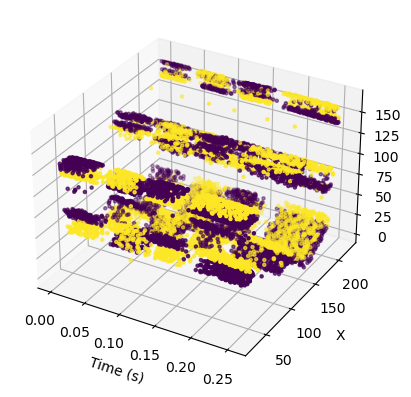

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

events_to_plot = events[0:10000]
events_to_plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Time (s)')
ax.set_ylabel('X')
ax.set_zlabel('Y')

ax.scatter(events_to_plot["time"], events_to_plot["x"], events_to_plot["y"], c=events_to_plot["polarity"], marker='.')